In [6]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'coronadata:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5175347%2F8641497%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240608%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240608T195241Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D8885f4b7054ee22e44e93b61603c57235aa7e30770877349b6aacfcbe68d038cafc7651deab9402284db4aa0b6a5f1bcbd81dfaf5acc52429e0d0ed2f6d4b88daa2251820c79907fb80a4a14394b37f000ca54d0bc3d2c135655bd23c651e6118c3922f99fd6778ebbd326945ba245016b9092057af5e4a08b3421a1c3584ce2b88233cb9679090da08ee2a9bf9c5993ca85f6a978ef486dc8b8252cdbeb2b60f9d9fbfeb5ad7910fcd36a48655c581f529ef7c617d0f8f03ee36524a60fe804648c6660d27896810e58c39f4dc97ad2d097334ad0a139fcde7fdf9077ada1677c7e68edeb924219858d3ecbe78c5392079ff48d599d93ea87fcd8d128c55fae'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 18470 bytes downloaded
Downloaded and uncompressed: coronadata
Data source import complete.


In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coronadata/corona_dat - corona_dat.csv


Corona Veri Seti İle Veri Görselleştirme - Hilal Türkaslan

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import numpy as np= Verileri modelleme kısmında matematiksel işlemler için kullanıldı. import seaborn as sns = Görselleştirme kısmında veriyi anlamlı bir grafiğe dönüştürmek için kullanıldı. import matplotlib.pyplot as plt = Veri görselleştirme işlemlerinin çoğunda kullanıldı. import pandas as pd = Verileri tablolama ve ön işleme aşamalarında kullanıldı. Pandas, NumPy, Seaborn, Matplotlib kitaplıkları içe aktarıldı.

In [9]:
from pandas.io.parsers.readers import read_csv
df=pd.read_csv('/kaggle/input/coronadata/corona_dat - corona_dat.csv')

proje için veri seti yüklendi

In [10]:
df.head(5)

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,US,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
0,1/22/2020,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1/23/2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2,1/24/2020,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1/25/2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1/26/2020,0,0,0,0,0,0,0,0,4,...,0,3,0,0,0,0,0,0,0,0


Veri setinin ilk 5 satırını getirir ve verinin yapısı hakkında ön bilgi verir.

In [11]:
df.tail(5)

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,US,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
107,5/8/2020,222,23,336,11,7,0,309,179,49,...,25,32381,146,12,8,52,0,11,22,4
108,5/9/2020,291,13,274,11,2,3,241,196,40,...,15,40777,95,14,0,0,0,0,89,1
109,5/10/2020,430,35,305,6,2,0,292,197,35,...,10,24076,104,15,0,35,0,18,20,1
110,5/11/2020,287,8,336,0,0,0,333,114,68,...,10,36341,175,20,8,38,1,6,0,0
111,5/12/2020,333,32,341,21,0,0,315,218,68,...,15,20723,55,16,3,7,0,10,174,0


Veri setinin son 5 satırını getirir ve verinin yapısı hakkında ön bilgi verir.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Columns: 188 entries, date to Zimbabwe
dtypes: int64(187), object(1)
memory usage: 164.6+ KB


Veriyle ilgili daha fazla bilgi sunar.

In [13]:
df[['date','Turkey','Italy','Germany','China','US']]

,date,Turkey,Italy,Germany,China,US
0,1/22/2020,0,0,0,593,1
1,1/23/2020,0,0,0,98,0
2,1/24/2020,0,0,0,291,1
3,1/25/2020,0,0,0,505,0
4,1/26/2020,0,0,0,693,3
...,...,...,...,...,...,...
107,5/8/2020,5308,4317,1276,17,32381
108,5/9/2020,4680,5285,2375,148,40777
109,5/10/2020,4800,3122,1675,60,24076
110,5/11/2020,4258,2324,2006,32,36341


5 ülke seçilerek bu ülkelerin günlük vaka sayıları hakkında bilgi edinildi.

<Axes: >

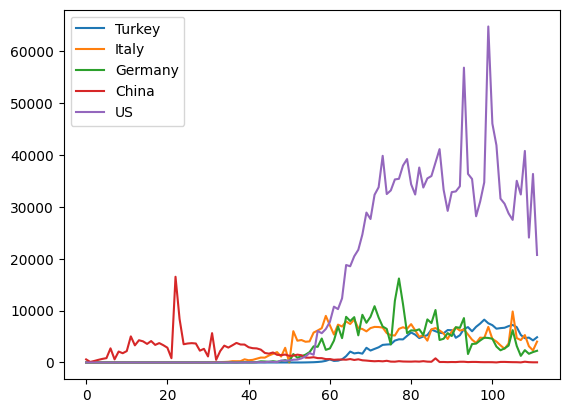

In [14]:
df_countries = df[['Turkey','Italy','Germany','China','US']]
df_countries.plot()

5 ülkedeki günlük vaka sayıları hakkında bilgi sağlandı.

<Axes: >

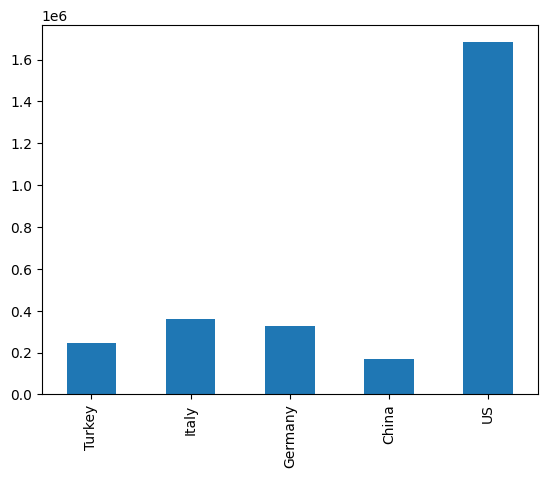

In [15]:
df_countries.sum(axis=0).plot(kind='bar')

5 ülkenin toplam vaka sayıları bar grafiğinde gösterildi.

In [16]:
df_ulke=df[['date','Turkey','Italy','Germany','China','US']]
df_ulke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     112 non-null    object
 1   Turkey   112 non-null    int64 
 2   Italy    112 non-null    int64 
 3   Germany  112 non-null    int64 
 4   China    112 non-null    int64 
 5   US       112 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 5.4+ KB


Date in type in hangi formatta olduğu hakkında bilgi edinildi.

In [17]:
df_ulke

,date,Turkey,Italy,Germany,China,US
0,1/22/2020,0,0,0,593,1
1,1/23/2020,0,0,0,98,0
2,1/24/2020,0,0,0,291,1
3,1/25/2020,0,0,0,505,0
4,1/26/2020,0,0,0,693,3
...,...,...,...,...,...,...
107,5/8/2020,5308,4317,1276,17,32381
108,5/9/2020,4680,5285,2375,148,40777
109,5/10/2020,4800,3122,1675,60,24076
110,5/11/2020,4258,2324,2006,32,36341


date tarih formattında geldi.

In [18]:
df_ulke['date']=pd.to_datetime(df_ulke['date'])
df_ulke.set_index('date',inplace=True)
df_ulke

,Turkey,Italy,Germany,China,US
date,,,,,
2020-01-22,0,0,0,593,1
2020-01-23,0,0,0,98,0
2020-01-24,0,0,0,291,1
2020-01-25,0,0,0,505,0
2020-01-26,0,0,0,693,3
...,...,...,...,...,...
2020-05-08,5308,4317,1276,17,32381
2020-05-09,4680,5285,2375,148,40777
2020-05-10,4800,3122,1675,60,24076


Date sıralı olarak geldiği için index olarak ayarlandı.

<Axes: xlabel='date'>

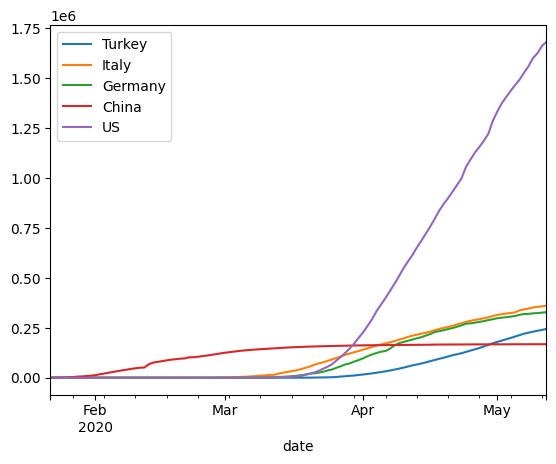

In [19]:
df_ulke.cumsum(axis=0).plot()

Kümülatif toplam grafikle gösterildi.

In [20]:
df_grafik = df_ulke.cumsum(axis=0)
df_grafik

,Turkey,Italy,Germany,China,US
date,,,,,
2020-01-22,0,0,0,593,1
2020-01-23,0,0,0,691,1
2020-01-24,0,0,0,982,2
2020-01-25,0,0,0,1487,2
2020-01-26,0,0,0,2180,5
...,...,...,...,...,...
2020-05-08,225654,346409,319798,167606,1560102
2020-05-09,230334,351694,322173,167754,1600879
2020-05-10,235134,354816,323848,167814,1624955


Vaka sayıları kümülatif toplamlarla veri seti oluşturuldu.

<Axes: xlabel='date'>

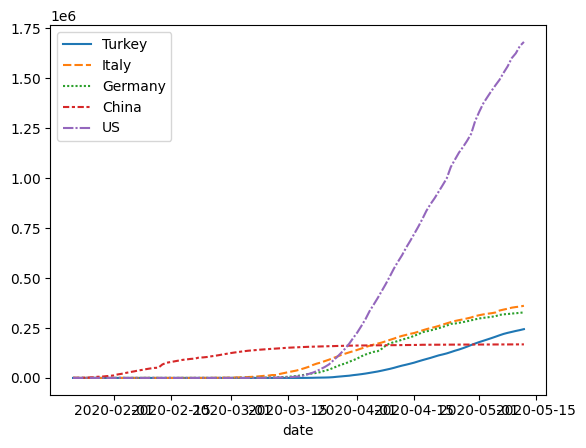

In [21]:
sns.lineplot(data=df_grafik)

Seaborn ile grafik görselleştirilmesi yapıldı.

In [22]:
!pip install bar_chart_race

In [23]:
pip install ffmpeg


Modüller import edildi

In [24]:
import bar_chart_race as bcr

In [26]:
bcr.bar_chart_race(df_grafik,filename='Corona Veri Seti İle Veri Görselleştirme - Hilal Türkaslan.mp4', figsize=(10, 8),
                  period_length=500,#toplam video uzunluğu
                   steps_per_period=10, #değişim hızı
                  title='Corona Veri Seti İle Veri Görselleştirme - Hilal Türkaslan')